ver. 02022020
# Module 4 - Strings and things

We have reached a stage where you have started doing things with python that would take too long to do by hand or by using excel. Today we will learn the final few functions to enable you to write code that can process large datasets. At the end of this module, you will be able to read a data file and plot the results, all within jupyter.

Today's topics:
 - Strings
 - File Handling
 - Importing packages
 - Basic plotting
 


### Strings

In typical code where you read information from a file, you are going to read each line of a file as a string. So knowing python's powerful options for string manipulation will help you write code that reads files like human eyes.

Refreshing our memories, string is just a set of characters enclosed by quotation marks. We can manipulate strings in many ways with python that is powerful and very useful in a variety of contexts. 

Refresher: Each character in a string has an index. Consider the string "A Test String":<br>

Character&emsp;Index<br>
"A"&emsp;&emsp;0<br>
" "&emsp;&emsp;1<br>
"T"&emsp;&emsp;2<br>
"E"&emsp;&emsp;3<br>
"S"&emsp;&emsp;4<br>
"T"&emsp;&emsp;5<br>
" "&emsp;&emsp;6<br>
"S"&emsp;&emsp;7<br>
"t"&emsp;&emsp;8<br>
"r"&emsp;&emsp;&ensp;9<br>
"i"&emsp;&emsp;10<br>
"n"&emsp;&emsp;11<br>
"g"&emsp;&emsp;12<br>

### Let us do some string manipulation!

Let's some biological problems to illustrate string manipulation in python:

 - How do I calculate the percentage of positively charged residues in a protein sequence?
 - How do I get the reverse complement of a DNA sequence?
 - How do I calculate the GC% in my **raw** sequencing reads?
 
#### In the course of these examples, we will learn how to: <br>
 - Count the occurance of a substring
 - Length of a string
 - Split a string
 - Replace characters in a string
 - Find characters in a string
 - Remove specific characters from a stirng
 - Ask if the string has alphabets or numbers
 - Open a file and read it inside jupyter
 - Use loops and datastructures to process files


### How do I calculate the percentage of positively charged residues in a protein sequence?

Let us take my favorite protein sequence and write code to find percentage of positively charged residues. Protein/DNA sequence files usually are in Fasta format:<br>
"A sequence in FASTA format begins with a single-line description, followed by lines of sequence data. The description line (defline) is distinguished from the sequence data by a greater-than (">") symbol at the beginning." ([From NCBI](https://blast.ncbi.nlm.nih.gov/Blast.cgi?CMD=Web&PAGE_TYPE=BlastDocs&DOC_TYPE=BlastHelp))<br><br>
In reality, you would write code to process a fasta file. We will learn later today how to open and read a file, but for now, we will just initialize a string as a shortcut:

In [1]:
fasta_file=">histone_H3\nMARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTE\
LLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA"
print(fasta_file)

>histone_H3
MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA


### String parsing

String parsing can be a powerful way to process **large** or **many** files in batch mode to extract information relevant to us, avoiding manual curation. 

In the example of `fasta_file`, there are two lines:

- First line is the sequence name, which starts with ">"
- Second line is the sequence itself

How do we extract information from this fasta entry? We will use `string.split(separator)`. Here, `fasta_file` is the string, and `\n` is the separator (split by lines).


In [2]:
#Two lines in the fasta file, let us separate the lines
fasta_lines = fasta_file.split('\n')

Quick refresher: What kind of data type is `fasta_lines`?

In [3]:
type(fasta_lines)

list

In [4]:
print(fasta_lines)

['>histone_H3', 'MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA']


There were two lines, each of which are an element in the list `fasta_lines`. <br>Now, which of the elements is the header and which of them is the sequence? 
<br><br><br>
How do I separate the header and the sequence?<br><br>
It is always useful to write out or think out the pseudocode, so you can solve the problem in your head first, before writing any code.<br><br>
Pseudocode:
- The header in a fasta starts with `>`. We can check for that with `startswith()`. 
- We will go through each element of the list `fasta_lines` and check for the `>` sign. 
- If the `>` sign is absent, that element is the sequence.

In [5]:
for i in fasta_lines: #for each line
    if i.startswith('>'): #Does the line start with the ">" symbol?
        seq_name = i
    else:
        seq = i
fasta_dict = {seq_name : seq}
print("Seq name:\t"+seq_name+"\nSeq:\t\t"+seq, '\n', fasta_dict)
fasta_dict.values()

Seq name:	>histone_H3
Seq:		MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA 
 {'>histone_H3': 'MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA'}


dict_values(['MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA'])

Ok, we have taught python to recognize the sequence now! What did we want to do again? Right, find the percentage of positive residues in the sequence.

Lysine (K), Arginine (R), and Histidine (H) are the positive residues. We use `string.count(pattern)` to count occurences of these residues. Here, `seq` is the `string` and `H`, `K`, and `R` form the `pattern`.

In [6]:
for i in fasta_lines: #for each line
    if i.startswith('>'): #Does the line start with the ">" symbol?
        seq_name = i
    else:
        seq = i
        #Count the positive residues when we get to a sequence line
        count = seq.count('K') + seq.count('R') + seq.count('H')
        #print the results inside the loop
        print("Seq name:\t"+seq_name+"\nSeq:\t\t"+seq+"\nCount of Positive Residues:"+str(count))

Seq name:	>histone_H3
Seq:		MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA
Count of Positive Residues:33


Wait, this "count" doesn't take into account the protein length. We can't compare any two proteins on this metric. This brings us to the important concept of **normalization** which we will do a lot with any data we deal with to enable comparisons. How will you **normalize** the *positivity* of a protein??
<br><br><br>
We can **normalize** to total protein length. We use `len(string)` to find length of strings.
(Can you think of other ways to normalize positive residues of a protein to enable comparisons?)

In [7]:
for i in fasta_lines: #for each line
    if i.startswith('>'): #Does the line start with the ">" symbol?
        seq_name = i
    else:
        seq = i
        #Count the positive residues when we get to a sequence line
        count = seq.count('K') + seq.count('R') + seq.count('H')
        percent_positive = count*100/len(seq)
        #print the results inside the loop
        #Use round to limit number of decimals
        print("Seq name:\t"+seq_name+"\nSeq:\t\t"+seq+"\n% of Positive Residues:"+str(round(percent_positive,1)))

Seq name:	>histone_H3
Seq:		MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA
% of Positive Residues:24.3


Ok, so is 24 high or low or par for the course? We need to study more proteins! Let us add two "housekeeping" proteins: GAPDH and Actin, and an RNA binding protein, HuR. Again, we are using a shortcut for now and assigning the sequences to a `string`

In [8]:
fasta_file=">histone_H3\nMARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLR\
FQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA\n>Actin\nMDDDIAALVVDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMG\
QKDSYVGDEAQSKRGILTLKYPIEHGIVTNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVMDSGDG\
VTHTVPIYEGYALPHAILRLDLAGRDLTDYLMKILTERGYSFTTTAEREIVRDIKEKLCYVALDFEQEMATAASSSSLEKSYELPDGQVITIGNERFRCPEALFQPSFLG\
MESCGIHETTFNSIMKCDVDIRKDLYANTVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKQEYDESGPSIVHRKCF\n>\
Gapdh\nMGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYMFQYDSTHGKFHGTVKAENGKLVINGNPITIFQERDPSKIKWGDAGAEYVVESTGVFT\
TMEKAGAHLQGGAKRVIISAPSADAPMFVMGVNHEKYDNSLKIISNASCTTNCLAPLAKVIHDNFGIVEGLMTTVHAITATQKTVDGPSGKLWRDGRGALQNIIPASTGA\
AKAVGKVIPELNGKLTGMAFRVPTANVSVVDLTCRLEKPAKYDDIKKVVKQASEGPLKGILGYTEHQVVSSDFNSDTHSSTFDAGAGIALNDHFVKLISWYDNEFGYSNRV\
VDLMAHMASKE\n>HuR\nMSNGYEDHMAEDCRGDIGRTNLIVNYLPQNMTQDELRSLFSSIGEVESAKLIRDKVAGHSLGYGFVNYVTAKDAERAINTLNGLRLQSKTIK\
VSYARPSSEVIKDANLYISGLPRTMTQKDVEDMFSRFGRIINSRVLVDQTTGLSRGVAFIRFDKRSEAEEAITSFNGHKPPGSSEPITVKFAANPNQNKNVALLSQLYHSP\
ARRFGGPVHHQAQRFRFSPMGVDHMSGLSGVNVPGNASSGWCIFIYNLGQDADEGILWQMFGPFGAVTNVKVIRDFNTNKCKGFGFVTMTNYEEAAMAIASLNGYRLGDKI\
LQVSFKTNKSHK"
print(fasta_file)

>histone_H3
MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA
>Actin
MDDDIAALVVDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIVTNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVMDSGDGVTHTVPIYEGYALPHAILRLDLAGRDLTDYLMKILTERGYSFTTTAEREIVRDIKEKLCYVALDFEQEMATAASSSSLEKSYELPDGQVITIGNERFRCPEALFQPSFLGMESCGIHETTFNSIMKCDVDIRKDLYANTVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKQEYDESGPSIVHRKCF
>Gapdh
MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYMFQYDSTHGKFHGTVKAENGKLVINGNPITIFQERDPSKIKWGDAGAEYVVESTGVFTTMEKAGAHLQGGAKRVIISAPSADAPMFVMGVNHEKYDNSLKIISNASCTTNCLAPLAKVIHDNFGIVEGLMTTVHAITATQKTVDGPSGKLWRDGRGALQNIIPASTGAAKAVGKVIPELNGKLTGMAFRVPTANVSVVDLTCRLEKPAKYDDIKKVVKQASEGPLKGILGYTEHQVVSSDFNSDTHSSTFDAGAGIALNDHFVKLISWYDNEFGYSNRVVDLMAHMASKE
>HuR
MSNGYEDHMAEDCRGDIGRTNLIVNYLPQNMTQDELRSLFSSIGEVESAKLIRDKVAGHSLGYGFVNYVTAKDAERAINTLNGLRLQSKTIKVSYARPSSEVIKDANLYISGLPRTMTQK

Here is the great thing about our code: If we were counting by hand, **we** have to do three times the work. But , we can use the exact same code that we wrote before - no extra effort!

In [9]:
#First create a list of lines
fasta_lines = fasta_file.split('\n')
#Now run the exact same loop!
for i in fasta_lines: #for each line
    if i.startswith('>'): #Does the line start with the ">" symbol?
        seq_name = i
    else:
        seq = i
        #Count the positive residues when we get to a sequence line
        count = seq.count('K') + seq.count('R') + seq.count('H')
        percent_positive = count*100/len(seq)
        #print the results inside the loop
        print("Seq name:\t"+seq_name+"\nSeq:\t\t"+seq+"\n% of Positive Residues:"+str(round(percent_positive,1)))

Seq name:	>histone_H3
Seq:		MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA
% of Positive Residues:24.3
Seq name:	>Actin
Seq:		MDDDIAALVVDNGSGMCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQSKRGILTLKYPIEHGIVTNWDDMEKIWHHTFYNELRVAPEEHPVLLTEAPLNPKANREKMTQIMFETFNTPAMYVAIQAVLSLYASGRTTGIVMDSGDGVTHTVPIYEGYALPHAILRLDLAGRDLTDYLMKILTERGYSFTTTAEREIVRDIKEKLCYVALDFEQEMATAASSSSLEKSYELPDGQVITIGNERFRCPEALFQPSFLGMESCGIHETTFNSIMKCDVDIRKDLYANTVLSGGTTMYPGIADRMQKEITALAPSTMKIKIIAPPERKYSVWIGGSILASLSTFQQMWISKQEYDESGPSIVHRKCF
% of Positive Residues:12.3
Seq name:	>Gapdh
Seq:		MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYMFQYDSTHGKFHGTVKAENGKLVINGNPITIFQERDPSKIKWGDAGAEYVVESTGVFTTMEKAGAHLQGGAKRVIISAPSADAPMFVMGVNHEKYDNSLKIISNASCTTNCLAPLAKVIHDNFGIVEGLMTTVHAITATQKTVDGPSGKLWRDGRGALQNIIPASTGAAKAVGKVIPELNGKLTGMAFRVPTANVSVVDLTCRLEKPAKYDDIKKVVKQASEGPLKGILGYTEHQVVSSDFNSDTHSSTFDAGAGIALNDHFVKLISWYDNEFGYSNRVVDLMAHMASKE
% of Positive Residue

What other questions could we ask with `count()` and `len()` commands in biological sequences?

### Replace
We don't want the `>` sign as part of the sequence name. How do we get rid of it? <br>

- `replace()` is like search & replace in text editing programs
- str.replace(character to be replaced, replacement, count)
- if count not specified, all instances replaced

In [10]:
seq_name = seq_name.replace(">",'')
print(seq_name)

HuR


### Find motifs??

So, HuR binds the motif `AUUUUUA`. How do we ask if an RNA sequence has this motif?

- `find()` method finds the first occurence of the specified value.
- `str.find ( prefix [ , start [ , end ] ] )`

In [11]:
seq = 'AUGCAUGCAGCUAGCUAAACCCGGGUUAUAUAGAAUUUUUAAAGUAGUAGGGCCGAGUAGAUUUUUAAGAGAGAUAUUUUUAGAGAGAUAGAUGAGAGG'
seq.find('AUUUUUA')

34

What if there are more motifs? How to find all of the motifs in a sequence?
(Googled it, and found the [answer](https://www.google.com/search?q=find+multiple+instances+python+string))

In [12]:
index=0
while index < len(seq):
    index = seq.find('AUUUUUA', index)
    if index == -1:
        break
    print('Motif found at', index)
    index += len('AUUUUUA')

Motif found at 34
Motif found at 60
Motif found at 75


### An everyday example of string manipulation

How to find the reverse complement of a *DNA* sequence?

In [13]:
seq = "AUGCCAUGUUGTC"

If, ahem, someone enters an *RNA* sequence, let us clean it up first:

In [14]:
if "U" in seq: #if it is RNA, let us change it to DNA before it gets degraded
    better_seq = seq.replace('U','T')

Now let us find the complement. We will take advantage of the fact that a string is iterable.

In [15]:
print(better_seq)

#First, let us define a list that will contain the complementary sequence
complement_seq=[]

#Iterate through the sequence (better_seq): this will go base by base
#and then add the complementary base to complement_seq

for i in range(0,len(better_seq)):
    if(better_seq[i] == 'A'):
        complement_seq.append('T')
    elif(better_seq[i] == 'T'):
        complement_seq.append('A')
    elif(better_seq[i] == 'G'):
        complement_seq.append('C')
    elif(better_seq[i] == 'C'):
        complement_seq.append('G')
    #OK, is the code working as expected??
    print("In the process\t",complement_seq)

print("\n\nHere is a sequence and its complement:\n")
print("5'",better_seq,"\t3'")
complement_better_seq = ''.join(complement_seq)
print("3'",complement_better_seq,"\t5'")

ATGCCATGTTGTC
In the process	 ['T']
In the process	 ['T', 'A']
In the process	 ['T', 'A', 'C']
In the process	 ['T', 'A', 'C', 'G']
In the process	 ['T', 'A', 'C', 'G', 'G']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T', 'A']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T', 'A', 'C']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T', 'A', 'C', 'A']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T', 'A', 'C', 'A', 'A']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T', 'A', 'C', 'A', 'A', 'C']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T', 'A', 'C', 'A', 'A', 'C', 'A']
In the process	 ['T', 'A', 'C', 'G', 'G', 'T', 'A', 'C', 'A', 'A', 'C', 'A', 'G']


Here is a sequence and its complement:

5' ATGCCATGTTGTC 	3'
3' TACGGTACAACAG 	5'


In [16]:
print("Ori_Seq\t\t\t5'\t",seq,"\t3'")
print("DNA Seq\t\t\t5'\t",better_seq,"\t3'")
print("Complement\t\t5'\t",complement_better_seq,"\t3'\n\n")

#Now reverse complement:
rev_better_seq = complement_better_seq[::-1]
#rev_better_seq = "".join(list(reversed(complement_better_seq)))
print("DNA Seq\t\t\t5'\t",better_seq,"\t3'")
print("Reverse Complement\t5'\t",rev_better_seq,"\t3'")

Ori_Seq			5'	 AUGCCAUGUUGTC 	3'
DNA Seq			5'	 ATGCCATGTTGTC 	3'
Complement		5'	 TACGGTACAACAG 	3'


DNA Seq			5'	 ATGCCATGTTGTC 	3'
Reverse Complement	5'	 GACAACATGGCAT 	3'


### What kind of characters does my string have?
 - isalpha() - are all the characters alphabets?
 - isnumeric() - are all characters numeric?

In [17]:
seq = "ATGCATCGA"
seq.isalpha()

True

In [18]:
seq.isnumeric()

False

### One way to check it is only a DNA sequence

Remove "A", "T", "G", and "C". Does anything remain?

In [19]:
input_seq = "ATAGAGCUUU"
#input_seq = "ATAGAGC"
tmp_seq = input_seq
tmp_seq = tmp_seq.replace("A","").replace("T","").replace("G","").replace("C","")
print(tmp_seq)
if(len(tmp_seq)>0):
    print("Non DNA alphabets detected")
else:
    print("Sequence seems like DNA")

UUU
Non DNA alphabets detected


## Reading fasta files

In the example where we calculated percentage positive residues, we put in the sequences by hand. This will hardly happen day-to-day: usually, you get a file that you need to process with your code. Let us see how we will do the same operations we did before, but when we are given a file of protein sequences (with all its quirks).<br><br>
To read a file in python, we use the command `open()`


### open() command
 - Two inputs - filename, mode
 - Mode can be 
     - 'r' for read
     - 'w' for write (overwrites existing file)
     - 'a' for append (adds to existing file)

In [20]:
a_file = open('protein_sequences.fasta', 'r' )
# "a_file" is an object in which the whole file is stored

#What datatype is "a_file"?
print(type(a_file))

#A good habit is to close the file after opening it. Always have the close command written out
#and add code between the open and close commands
a_file.close()

<class '_io.TextIOWrapper'>


In most scenarios, we will read the file line by line. Here is how we do that:

In [21]:
#print every line
a_file = open('protein_sequences.fasta', 'r' )
for line in a_file:
    print(line)
a_file.close()

>HuR

MSNGYEDHMAEDCRGDIGRTNLIVNYLPQNMTQDELRSLFSSIGEVESAKLIRDKVAGHS 

LGYGFVNYVTAKDAERAINTLNGLRLQSKTIKVSYARPSSEVIKDANLYISGLPRTMTQK 

DVEDMFSRFGRIINSRVLVDQTTGLSRGVAFIRFDKRSEAEEAITSFNGHKPPGSSEPIT 

VKFAANPNQNKNVALLSQLYHSPARRFGGPVHHQAQRFRFSPMGVDHMSGLSGVNVPGNA

SSGWCIFIYNLGQDADEGILWQMFGPFGAVTNVKVIRDFNTNKCKGFGFVTMTNYEEAAM 

AIASLNGYRLGDKILQVSFKTNKSHK 

>Histone_H3

MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTE

LLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTI

MPKDIQLARRIRGERA

>Gapdh

MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYMFQYDSTHGKFHGTV

KAENGKLVINGNPITIFQERDPSKIKWGDAGAEYVVESTGVFTTMEKAGAHLQGGAKRVI

ISAPSADAPMFVMGVNHEKYDNSLKIISNASCTTNCLAPLAKVIHDNFGIVEGLMTTVHA

ITATQKTVDGPSGKLWRDGRGALQNIIPASTGAAKAVGKVIPELNGKLTGMAFRVPTANV

SVVDLTCRLEKPAKYDDIKKVVKQASEGPLKGILGYTEHQVVSSDFNSDTHSSTFDAGAG

IALNDHFVKLISWYDNEFGYSNRVVDLMAHMASKE

>Actin

MCEEETTALVCDNGSGLCKAGFAGDDAPRAVFPSIVGRPRHQGVMVGMGQKDSYVGDEAQ

SKRGILTLKYPIEHGIITNWDDMEKIWHHSFYNELRVAPEEHPTLLTEAPLNPKANREKM

TQIMFETFN

Wow, we can iterate over `a_file` just like the list `fasta_lines`! Can we then use the same code with a few edits??

In [22]:
a_file = open('protein_sequences.fasta', 'r' )
for i in a_file: #for each line
    if i.startswith('>'): #Does the line start with the ">" symbol?
        seq_name = i
    else:
        seq = i
        #Count the positive residues when we get to a sequence line
        count = seq.count('K') + seq.count('R') + seq.count('H')
        percent_positive = count*100/len(seq)
        #print the results inside the loop
        print("Seq name:\t"+seq_name+"\nSeq:\t\t"+seq+"\n% of Positive Residues:"+str(round(percent_positive,1)))
        #Put "ST" and "EN" to denote start and end of string that we read in:
        # print("Seq name:\t"+seq_name+"\nSeq:\t\tST##"+seq+"##EN\n% of Positive Residues:"+str(round(percent_positive,1)))
a_file.close()

Seq name:	>HuR

Seq:		MSNGYEDHMAEDCRGDIGRTNLIVNYLPQNMTQDELRSLFSSIGEVESAKLIRDKVAGHS 

% of Positive Residues:12.9
Seq name:	>HuR

Seq:		LGYGFVNYVTAKDAERAINTLNGLRLQSKTIKVSYARPSSEVIKDANLYISGLPRTMTQK 

% of Positive Residues:14.5
Seq name:	>HuR

Seq:		DVEDMFSRFGRIINSRVLVDQTTGLSRGVAFIRFDKRSEAEEAITSFNGHKPPGSSEPIT 

% of Positive Residues:14.5
Seq name:	>HuR

Seq:		VKFAANPNQNKNVALLSQLYHSPARRFGGPVHHQAQRFRFSPMGVDHMSGLSGVNVPGNA

% of Positive Residues:16.4
Seq name:	>HuR

Seq:		SSGWCIFIYNLGQDADEGILWQMFGPFGAVTNVKVIRDFNTNKCKGFGFVTMTNYEEAAM 

% of Positive Residues:6.5
Seq name:	>HuR

Seq:		AIASLNGYRLGDKILQVSFKTNKSHK 

% of Positive Residues:21.4
Seq name:	>Histone_H3

Seq:		MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTE

% of Positive Residues:31.1
Seq name:	>Histone_H3

Seq:		LLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTI

% of Positive Residues:14.8
Seq name:	>Histone_H3

Seq:		MPKDIQLARRIRGERA

% of Positive Residues:29.4
Seq name:	>Gapdh

Seq:		MGKVKVGVNGFGRIGRLVTRA

### "We're not in Kansas anymore"

Till now, we were dealing with nice examples. But, real data are messy and most of the time is spent cleaning up the data to make them usable. What are the problems here?

- Sequences are not in a single line
- There are blank spaces and new lines at end of each line

How do we clean up the data and read it into the variables we have? We will use two tricks:

- String manipulation for cleanup
- Make loops and conditionals to read the file like a human

### strip, rstrip and lstrip

- Default - remove whitespace from beginning, end, or both sides 
- For rstrip, lstrip - all combinations of characters in the chars argument are removed from the right/left of the string until first mismatch.

In [23]:
a_file = open('protein_sequences.fasta', 'r' )
for i in a_file: #for each line
    if i.startswith('>'): #Does the line start with the ">" symbol?
        #Adding rstrip and lstrip
        seq_name = i.rstrip().lstrip('>')
    else:
        #Adding rstrip
        seq = i.rstrip()
        #print the results inside the loop
        print("Seq name:\t"+seq_name+"\nSeq:\t\tST##"+seq+"##EN")
a_file.close()

Seq name:	HuR
Seq:		ST##MSNGYEDHMAEDCRGDIGRTNLIVNYLPQNMTQDELRSLFSSIGEVESAKLIRDKVAGHS##EN
Seq name:	HuR
Seq:		ST##LGYGFVNYVTAKDAERAINTLNGLRLQSKTIKVSYARPSSEVIKDANLYISGLPRTMTQK##EN
Seq name:	HuR
Seq:		ST##DVEDMFSRFGRIINSRVLVDQTTGLSRGVAFIRFDKRSEAEEAITSFNGHKPPGSSEPIT##EN
Seq name:	HuR
Seq:		ST##VKFAANPNQNKNVALLSQLYHSPARRFGGPVHHQAQRFRFSPMGVDHMSGLSGVNVPGNA##EN
Seq name:	HuR
Seq:		ST##SSGWCIFIYNLGQDADEGILWQMFGPFGAVTNVKVIRDFNTNKCKGFGFVTMTNYEEAAM##EN
Seq name:	HuR
Seq:		ST##AIASLNGYRLGDKILQVSFKTNKSHK##EN
Seq name:	Histone_H3
Seq:		ST##MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTE##EN
Seq name:	Histone_H3
Seq:		ST##LLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTI##EN
Seq name:	Histone_H3
Seq:		ST##MPKDIQLARRIRGERA##EN
Seq name:	Gapdh
Seq:		ST##MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYMFQYDSTHGKFHGTV##EN
Seq name:	Gapdh
Seq:		ST##KAENGKLVINGNPITIFQERDPSKIKWGDAGAEYVVESTGVFTTMEKAGAHLQGGAKRVI##EN
Seq name:	Gapdh
Seq:		ST##ISAPSADAPMFVMGVNHEKYDNSLKIISNASCTTNCLAPLAKVIHDNF

Okay, now the pesky newlines and spaces have been removed. What about the fact that sequences are on multiple lines? Here is where we make the code read the file like a human. If we were reading the file manually, here is how we would do it:

- Is there a ">" sign? That is a sequence name. The next line(s) will have the sequence.
- No ">" sign, so the previous sequence name still applies, let us keep appending the lines till we see a ">" sign
- We saw a ">" sign again! The previous sequence is complete! Let us do the analysis on that previous sequence

Here is how we an write the code for it:

In [24]:
ln=0 #We need to keep track of the line number
seq=''
a_file = open('protein_sequences.fasta', 'r' )
for i in a_file: #for each line
    ln+=1
    if i.startswith('>'): #Does the line start with the ">" symbol?
        #Check if this is the first line:
        if ln == 1:
            pass
        else:
            #The previous sequence is complete, count the positive residues when we get to a sequence line
            count = seq.count('K') + seq.count('R') + seq.count('H')
            percent_positive = count*100/len(seq)
            #print the results inside the loop
            print("Seq name:\t"+seq_name+"\nSeq:\t\t"+seq+"\n% of Positive Residues:"+str(round(percent_positive,1)))
            seq=''
        
        #Now process the new sequence name:
        seq_name = i.rstrip().lstrip('>')
        
    else:
        #print(seq_name,seq)
        seq = seq + i.rstrip()

a_file.close()
#Does everything look good?

Seq name:	HuR
Seq:		MSNGYEDHMAEDCRGDIGRTNLIVNYLPQNMTQDELRSLFSSIGEVESAKLIRDKVAGHSLGYGFVNYVTAKDAERAINTLNGLRLQSKTIKVSYARPSSEVIKDANLYISGLPRTMTQKDVEDMFSRFGRIINSRVLVDQTTGLSRGVAFIRFDKRSEAEEAITSFNGHKPPGSSEPITVKFAANPNQNKNVALLSQLYHSPARRFGGPVHHQAQRFRFSPMGVDHMSGLSGVNVPGNASSGWCIFIYNLGQDADEGILWQMFGPFGAVTNVKVIRDFNTNKCKGFGFVTMTNYEEAAMAIASLNGYRLGDKILQVSFKTNKSHK
% of Positive Residues:14.1
Seq name:	Histone_H3
Seq:		MARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEACEAYLVGLFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA
% of Positive Residues:24.3
Seq name:	Gapdh
Seq:		MGKVKVGVNGFGRIGRLVTRAAFNSGKVDIVAINDPFIDLNYMVYMFQYDSTHGKFHGTVKAENGKLVINGNPITIFQERDPSKIKWGDAGAEYVVESTGVFTTMEKAGAHLQGGAKRVIISAPSADAPMFVMGVNHEKYDNSLKIISNASCTTNCLAPLAKVIHDNFGIVEGLMTTVHAITATQKTVDGPSGKLWRDGRGALQNIIPASTGAAKAVGKVIPELNGKLTGMAFRVPTANVSVVDLTCRLEKPAKYDDIKKVVKQASEGPLKGILGYTEHQVVSSDFNSDTHSSTFDAGAGIALNDHFVKLISWYDNEFGYSNRVVDLMAHMASKE
% of Positive Residues:13.7


## A real life problem

Sequencing reads from Illumina platform are stored as fastq files. Each sequencing "read" gets four lines. Here is an example:

`@SRR036139.1 11_26_8:5:1:749:1421 length=36
GCTGGCTGCGTCTGTGGTGGGTTTCATGTTAAGGTC
+SRR036139.1 11_26_8:5:1:749:1421 length=36
IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII`

Description from FASTQ wiki page:
 - Line 1 begins with a '@' character and is followed by a sequence identifier and an optional description (like a FASTA title line).
 - Line 2 is the raw sequence letters.
 - Line 3 begins with a '+' character and is optionally followed by the same sequence identifier (and any description) again.
 - Line 4 encodes the quality values for the sequence in Line 2, and must contain the same number of symbols as letters in the sequence.
 
### We want to determine the GC content of the reads in any FASTQ file. 
GC content could tell you about any bias in the library or if you are sequencing a new species for example, it tells you the properties of the species' genome. So, if you have a fastq file, how would you determine the GC content of the reads?

- Somehow get the sequences from the file into a data structure you learned
- Examine the sequence to get GC content
- Present the data

#### To get GC content of the sequences in a fastq file:
 - Find the line with sequence : Count every 4th line starting from 2
 - Get the GC content : (number of G + number of C)/(total number of nucleotides) 

#### Before we begin, a couple of important points:

#### Toy Models are Important
When you write new code, don't apply it to actual data in the beginning - the data may be complicated enough for you to not be able to judge if your code is running properly. Instead, start with a toy model - something that will give you a trivial result. For example, here is a toy fastq file that has only two sequences with GC content of 100% and 50%:<br>
`@TEST1
GCGCGCGCGCGC
+TEST1
IIIIIIIIII
@TEST2
ATGCATGCATGC
+TEST2
IIIIIIIIIIII`

#### Also important to spell out the architecture of the data structures you will create

Some of the data structures we will use:

- `seqs` - a dictionary, where the key will be the sequence number, value will be the sequence
- `gc_content` - a dictionary, where the key will be the sequence number, value will be the GC content
- `fastq_file` - a file wrapper for reading the fastq file 

In [25]:
#How do we get check for 2, 6, 10, 14th lines??
#If we subtract 2 from them: 0, 4, 8, 12, ... should be divisible by 4. Let us check:
for i in range(1,20,1):
    print(i,(i-2)%4)

1 3
2 0
3 1
4 2
5 3
6 0
7 1
8 2
9 3
10 0
11 1
12 2
13 3
14 0
15 1
16 2
17 3
18 0
19 1


In [26]:
#Can we now pick the line numbers with the sequence?
for i in range(1,20,1):
    if ((i-2)%4 == 0):
        print(i,"is the sequence line")

2 is the sequence line
6 is the sequence line
10 is the sequence line
14 is the sequence line
18 is the sequence line


In [27]:
#Ok, line 2 is the sequence line for the 1st sequence, 6 for second sequence, and so forth.
#Can we assign this explicitly?
for i in range(2,20,4):
    key = int((i-2)/4)+1 # Convert the line_no to a sequence ID
    print("line",i,"contains the sequence for read #",key)

line 2 contains the sequence for read # 1
line 6 contains the sequence for read # 2
line 10 contains the sequence for read # 3
line 14 contains the sequence for read # 4
line 18 contains the sequence for read # 5


Okay, let us put all of this together

In [28]:
seqs={} # A dictionary to store sequences if needed later

gc_content={} # A dictionary to store GC content if needed later

line_no = 0 # Variable to count lines

fastq_file = open('toy.fastq', 'r' ) #Open the fastq file

for line in fastq_file: # Iterate through the fastq file
    line_no+=1 #counting line numbers
      
    if (line_no-2)%4 == 0: # Does the line number belong to the series 2, 6, 10, 14, etc. ?
        key = int((line_no-2)/4)+1 # Convert the line_no to a sequence ID
        line=line.rstrip()
        seqs[key] = line #Populate seqs dictionary
        gc = line.count('G') + line.count('C')
        gc=round(gc*100/len(line),2) #make it percentage, make it look pretty with round()
        gc_content[key] = gc
        print(key+1,line,gc) #print the results

2 GCGCGCGCGCGC 100.0
3 ATGCATGCATGC 50.0


Let us try the real data now. (First 250 sequences from the SRA file: SRR036139

In [29]:
seqs={} # A dictionary to store sequences if needed later

gc_content={} # A dictionary to store GC content if needed later

line_no = 0 # Variable to count lines

fastq_file = open('example.fastq', 'r' ) #Open the fastq file

#Let us write sequence details in a file called "seq_details.txt"
fh = open("seq_details.txt","w")

for line in fastq_file: # Iterate through the fastq file
    line_no+=1 #counting line numbers
      
    if (line_no-2)%4 == 0: # Does the line number belong to the series 2, 6, 10, 14, etc. ?
        key = int((line_no-2)/4)+1 # Convert the line_no to a sequence ID
        line=line.rstrip()
        seqs[key] = line #Populate seqs dictionary
        gc = line.count('G') + line.count('C')
        gc_p=round(gc*100/len(line),2) #make it percentage, make it look pretty with round()
        gc_content[key] = gc_p
        #print the results to a string
        write_str = "Seq #"+ str(key) + " Seq: " + line + " Number of GC: " + str(gc) +" Sequence Length: "+ str(len(line)) \
        + " GC Content: " + str(gc_p) + "\n"
        #print the string to a file
        fh.write(write_str)

fastq_file.close()


Check the "seq_details.txt" file - we just calculated the GC content of 250 sequences.

However, this is not really useful yet because there are 250 numbers and we don't have a sense of what the data is telling us. A histogram may be more useful. There is a direct histogram function we will discuss later, but here will do it from scratch. This is an example of how powerful coding can be - writing code to (insert your favorite analysis) from scratch!

### How to make a histogram? 

Wikipedia says: "To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but not required to be) of equal size."

#### How to bin data?  

The idea is to put an interval of numbers into the midpoint like this:

1 2 3 4 5 6 7 8 9 10,11,12...

If we group these numbers by 4:

(1,2,3,4) (5,6,7,8) (9,10,11,12)

The midpoints are:

2.5, 6.5, 10.5

If we group the same numbers by 5:

(1,2,3,4,5) (6,7,8,9,10) (11,12,13,14,15)

The midpoints are:
3, 8, 13

#### How do we generalize this in our code? 
By combining `int()` and `round()`. I came up with the formula below by trial and error. I am sure you can come up with your own and even do better.

In [30]:
bin_size = 5
fact = (bin_size/2)-0.5
print("i bin")
for i in range(1,21,1):
    #bin1 = int( round( ((i-0.5)/bin_size + 0.5),0))*bin_size
    #bin1 = int( round((i/bin_size),0))*bin_size
    bin1 = int( round(( (i-0.5)/bin_size + 0.5),0))*bin_size - fact
    print(i,bin1)

i bin
1 3.0
2 3.0
3 3.0
4 3.0
5 3.0
6 8.0
7 8.0
8 8.0
9 8.0
10 8.0
11 13.0
12 13.0
13 13.0
14 13.0
15 13.0
16 18.0
17 18.0
18 18.0
19 18.0
20 18.0


Ok, we can assign a "bin" to any number. Now we need to count the numbers in each bin. We will put these counts in a dictionary called `hist`, where the keys are the bins and values are the counts.

In [31]:
hist = {}

bin_size = 5
fact = (bin_size/2)-0.5

for i in range(1,21,1):
    bin1 = int( round(( (i-0.5)/bin_size + 0.5),0))*bin_size - fact
    #if the bin exists, add to it
    if bin1 in hist:
        hist[bin1] += 1
    #if bin doesn't exist, add to it
    else:
        hist[bin1] = 1

#let us now print the histogram
for i in sorted(hist):
    print(i,hist[i])

3.0 5
8.0 5
13.0 5
18.0 5


Ok, let us do the same with our `gc_content` dictionary. The keys of `gc_content` are sequence numbers and the values are the corresponding GC content in percentage

In [32]:
#let us assume bin size of 5 percent
bin_size = 2
fact = (bin_size/2)-0.5

#let us write the histogram into a file called "GC_hist.txt"
fh = open("GC_hist.txt","w")

hist = {} #declare the histogram
#print(gc_content)
for i in gc_content:
    
    bin1 = int( round(( (gc_content[i]-0.5)/bin_size + 0.5),0))*bin_size - fact
    print(bin1)
    if bin1 in hist:
        hist[bin1] += 1
        
    else:
        hist[bin1] = 1
print(hist)
for i in sorted(hist):
    hist[i]=hist[i]*100/len(gc_content)
    write_str =str(i) + " " + str(hist[i]) + "\n"
    fh.write(write_str)
fh.close()
print(gc_content)
print(hist)

55.5
39.5
53.5
49.5
41.5
63.5
31.5
39.5
53.5
31.5
43.5
43.5
53.5
49.5
53.5
53.5
35.5
33.5
35.5
39.5
61.5
39.5
41.5
53.5
39.5
39.5
57.5
53.5
43.5
55.5
53.5
43.5
47.5
47.5
43.5
41.5
39.5
53.5
49.5
33.5
53.5
31.5
35.5
47.5
55.5
35.5
41.5
31.5
53.5
39.5
31.5
35.5
35.5
43.5
47.5
35.5
55.5
41.5
41.5
49.5
35.5
53.5
49.5
47.5
39.5
39.5
33.5
27.5
41.5
43.5
49.5
55.5
53.5
35.5
35.5
43.5
47.5
43.5
55.5
47.5
53.5
49.5
55.5
47.5
21.5
53.5
49.5
27.5
49.5
55.5
55.5
41.5
47.5
49.5
33.5
33.5
47.5
43.5
41.5
19.5
47.5
43.5
49.5
49.5
43.5
35.5
63.5
53.5
53.5
27.5
43.5
31.5
49.5
43.5
33.5
31.5
53.5
53.5
53.5
53.5
49.5
39.5
49.5
57.5
49.5
49.5
47.5
49.5
49.5
43.5
33.5
41.5
41.5
31.5
33.5
41.5
33.5
53.5
19.5
49.5
35.5
43.5
49.5
49.5
49.5
43.5
55.5
43.5
53.5
39.5
49.5
39.5
53.5
43.5
43.5
49.5
43.5
41.5
53.5
39.5
39.5
53.5
55.5
47.5
47.5
53.5
49.5
49.5
49.5
49.5
31.5
53.5
49.5
39.5
47.5
41.5
31.5
53.5
35.5
47.5
39.5
53.5
41.5
53.5
43.5
49.5
27.5
31.5
41.5
47.5
43.5
47.5
49.5
53.5
49.5
33.5
43.5
47.5
41.5
27.5


Would be nice if we could see a plot. I don't know how to make a simple plot in Jupyter, so I just googled and found this link: https://matplotlib.org/gallery/lines_bars_and_markers/simple_plot.html

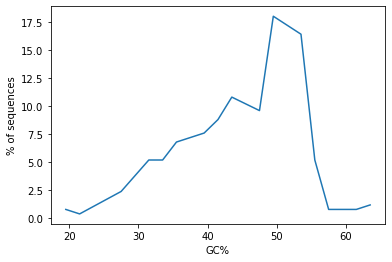

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

yt = []

x = np.asarray(sorted(hist))
for i in sorted(hist):
    yt.append(hist[i])
y = np.asarray(yt)

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='GC%', ylabel='% of sequences')

plt.show()

fig.savefig("test.png")

## Excercise 1: 
Use the pyplot histogram tool to plot a distribution and cumulative distribution as subplots of one plot.

{55.5: 5.2, 39.5: 7.6, 53.5: 16.4, 49.5: 18.0, 41.5: 8.8, 63.5: 1.2, 31.5: 5.2, 43.5: 10.8, 35.5: 6.8, 33.5: 5.2, 61.5: 0.8, 57.5: 0.8, 47.5: 9.6, 27.5: 2.4, 21.5: 0.4, 19.5: 0.8}
19.5 0.8
21.5 0.4
27.5 2.4
31.5 5.2
33.5 5.2
35.5 6.8
39.5 7.6
41.5 8.8
43.5 10.8
47.5 9.6
49.5 18.0
53.5 16.4
55.5 5.2
57.5 0.8
61.5 0.8
63.5 1.2



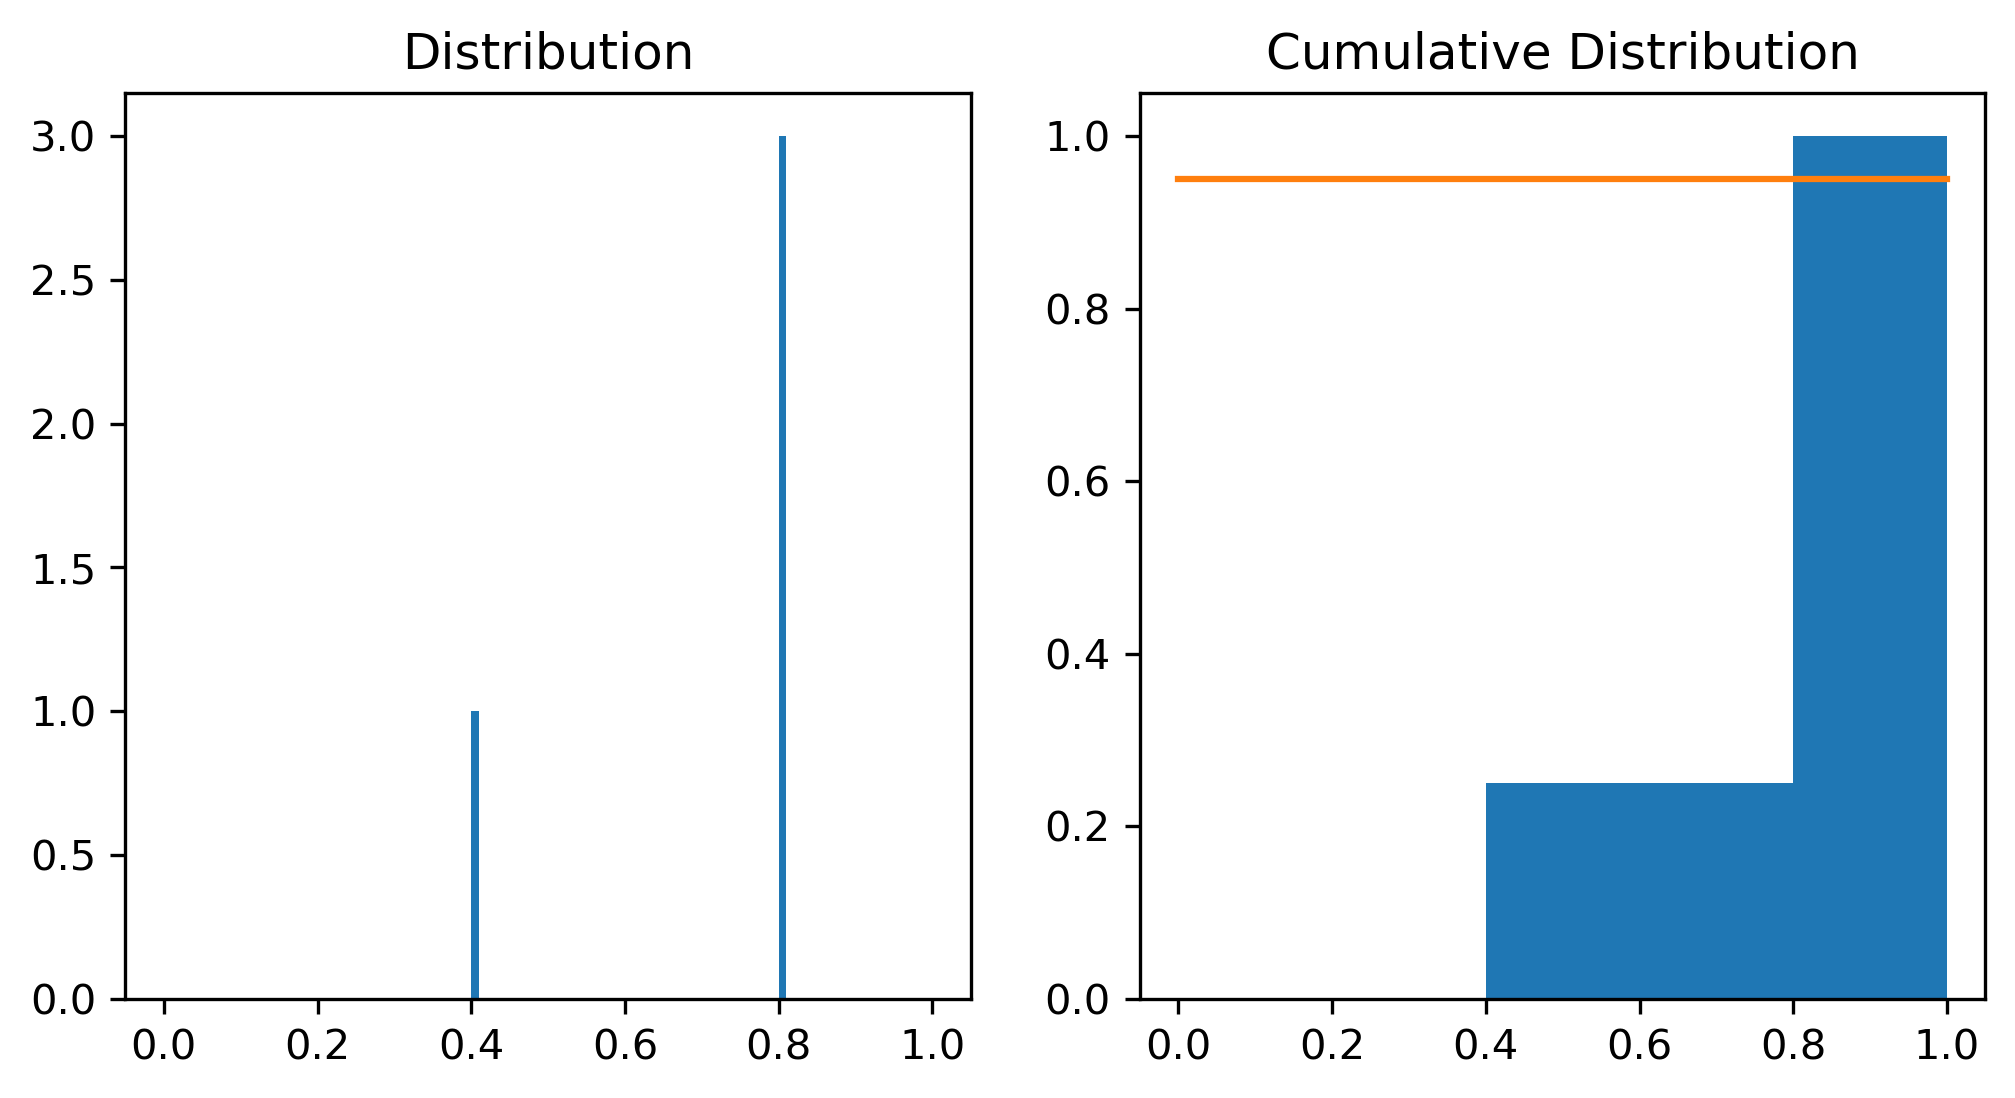

In [34]:
print(hist)
fh = open("GC_hist.txt","r")
print(fh.read())
mybins = [ x * 0.01 for x in range(101)]

fig = plt.figure(figsize=(8,4), dpi=300)

plt.subplot(1, 2, 1)
plt.title("Distribution")
plt.hist(y, bins=mybins)

plt.subplot(1, 2, 2)
plt.title("Cumulative Distribution")
plt.hist(y, bins=mybins, density=True, cumulative=1)
plt.plot([0,1],[0.95,0.95]);

## Excercise 2
Use the EMBL EBI Proteins EBI to download their sequence for Actin and find the longest overlapping sequence with the one provided above. The accession number for actin is A0A015J624 and the base url is:
https://www.ebi.ac.uk/proteins/api/proteins


In [101]:
import requests
url = " https://www.ebi.ac.uk/proteins/api/proteins/A0A015J624/"
res = requests.get(url)
ls = res.text.split(',')

In [102]:
with open ('actin_fasta.txt' , 'w') as actin:
    for i in ls:
        print(i)
        if i[1:9] == 'sequence':
            #i+=1
            print(i)
            actin.write(i)
actin.close()
with open('actin_fasta.txt', 'r') as actin:
    ls = {}
    for line in actin:
        print(line)
        line.rstrip()


{"accession":"A0A015J624"
"id":"A0A015J624_RHIIW"
"proteinExistence":"Inferred from homology"
"info":{"type":"TrEMBL"
"created":"2014-06-11"
"modified":"2022-01-19"
"version":27}
"organism":{"taxonomy":1432141
"names":[{"type":"scientific"
"value":"Rhizophagus irregularis (strain DAOM 197198w)"}
{"type":"common"
"value":"Glomus intraradices"}]
"lineage":["Eukaryota"
"Fungi"
"Fungi incertae sedis"
"Mucoromycota"
"Glomeromycotina"
"Glomeromycetes"
"Glomerales"
"Glomeraceae"
"Rhizophagus"]}
"protein":{"submittedName":[{"fullName":{"value":"Actin"
"evidences":[{"code":"ECO:0000313"
"source":{"name":"EMBL"
"id":"EXX64987.1"
"url":"https://www.ebi.ac.uk/ena/browser/view/EXX64987.1"}}]}}]}
"gene":[{"orfNames":[{"value":"RirG_137620"
"evidences":[{"code":"ECO:0000313"
"source":{"name":"EMBL"
"id":"EXX64987.1"
"url":"https://www.ebi.ac.uk/ena/browser/view/EXX64987.1"}}]}]}]
"comments":[{"type":"FUNCTION"
"text":[{"value":"Actins are highly conserved proteins that are involved in various types o